# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 635


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng =city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao geraldo do araguaia
Processing Record 2 of Set 1 | rapid city
Processing Record 3 of Set 1 | katsuura
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | barcelos
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | lixourion
Processing Record 12 of Set 1 | rocha
Processing Record 13 of Set 1 | pevek
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | damghan
Processing Record 17 of Set 1 | saint-francois
Processing Record 18 of Set 1 | tia mare
Processing Record 19 of Set 1 | beyneu
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | port moresby
Processing Record 23 of Set

Processing Record 40 of Set 4 | pingxiang
Processing Record 41 of Set 4 | chokurdakh
Processing Record 42 of Set 4 | arraial do cabo
Processing Record 43 of Set 4 | poya
Processing Record 44 of Set 4 | sao gabriel da cachoeira
Processing Record 45 of Set 4 | saint-philippe
Processing Record 46 of Set 4 | sept-iles
Processing Record 47 of Set 4 | vondrozo
Processing Record 48 of Set 4 | port hedland
Processing Record 49 of Set 4 | guerrero negro
Processing Record 0 of Set 5 | port elizabeth
Processing Record 1 of Set 5 | along
Processing Record 2 of Set 5 | carutapera
Processing Record 3 of Set 5 | deh rawud
City not found. Skipping...
Processing Record 4 of Set 5 | helena
Processing Record 5 of Set 5 | kavieng
Processing Record 6 of Set 5 | miri
Processing Record 7 of Set 5 | bongandanga
Processing Record 8 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 5 | lompoc
Processing Record 10 of Set 5 | pacific grove
Processing Record 11 of Set 5 | toora-khem
Pro

Processing Record 29 of Set 8 | aklavik
Processing Record 30 of Set 8 | salinopolis
Processing Record 31 of Set 8 | takoradi
Processing Record 32 of Set 8 | sambava
Processing Record 33 of Set 8 | isla mujeres
Processing Record 34 of Set 8 | viedma
Processing Record 35 of Set 8 | amposta
Processing Record 36 of Set 8 | arman
Processing Record 37 of Set 8 | sarangarh
Processing Record 38 of Set 8 | kenai
Processing Record 39 of Set 8 | viligili
City not found. Skipping...
Processing Record 40 of Set 8 | kulhudhuffushi
Processing Record 41 of Set 8 | serik
Processing Record 42 of Set 8 | pilar
Processing Record 43 of Set 8 | kendal
Processing Record 44 of Set 8 | yar-sale
Processing Record 45 of Set 8 | gavle
Processing Record 46 of Set 8 | daitari
Processing Record 47 of Set 8 | makuyuni
Processing Record 48 of Set 8 | itaituba
Processing Record 49 of Set 8 | jalu
Processing Record 0 of Set 9 | marquette
Processing Record 1 of Set 9 | jacareacanga
Processing Record 2 of Set 9 | indianol

Processing Record 15 of Set 12 | puri
Processing Record 16 of Set 12 | cotonou
Processing Record 17 of Set 12 | praya
Processing Record 18 of Set 12 | zyryanka
Processing Record 19 of Set 12 | erzin
Processing Record 20 of Set 12 | eenhana
Processing Record 21 of Set 12 | corner brook
Processing Record 22 of Set 12 | cameta
Processing Record 23 of Set 12 | yenagoa
Processing Record 24 of Set 12 | irbil
Processing Record 25 of Set 12 | omboue
Processing Record 26 of Set 12 | nantucket
Processing Record 27 of Set 12 | mahajanga
Processing Record 28 of Set 12 | antalaha
Processing Record 29 of Set 12 | suzu
City not found. Skipping...
Processing Record 30 of Set 12 | saint-pierre
Processing Record 31 of Set 12 | shirgaon
Processing Record 32 of Set 12 | kapit
Processing Record 33 of Set 12 | shubarshi
Processing Record 34 of Set 12 | litovko
Processing Record 35 of Set 12 | verkhnevilyuysk
Processing Record 36 of Set 12 | talcahuano
Processing Record 37 of Set 12 | chelyabinsk-70
City not

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao geraldo do araguaia,-6.4006,-48.5550,23.32,94,84,0.75,BR,1675640534
1,rapid city,44.0805,-103.2310,9.29,46,75,7.72,US,1675640228
2,katsuura,35.1333,140.3000,9.25,72,11,3.73,JP,1675640538
3,jamestown,42.0970,-79.2353,5.80,60,100,6.17,US,1675640511
4,bluff,-46.6000,168.3333,14.64,85,63,10.85,NZ,1675640272


In [6]:
# Convert into proper date format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao geraldo do araguaia,-6.4006,-48.5550,23.32,94,84,0.75,BR,2023-02-05
1,rapid city,44.0805,-103.2310,9.29,46,75,7.72,US,2023-02-05
2,katsuura,35.1333,140.3000,9.25,72,11,3.73,JP,2023-02-05
3,jamestown,42.0970,-79.2353,5.80,60,100,6.17,US,2023-02-05
4,bluff,-46.6000,168.3333,14.64,85,63,10.85,NZ,2023-02-05


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities1.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities1.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao geraldo do araguaia,-6.4006,-48.5550,23.32,94,84,0.75,BR,2023-02-05
1,rapid city,44.0805,-103.2310,9.29,46,75,7.72,US,2023-02-05
2,katsuura,35.1333,140.3000,9.25,72,11,3.73,JP,2023-02-05
3,jamestown,42.0970,-79.2353,5.80,60,100,6.17,US,2023-02-05
4,bluff,-46.6000,168.3333,14.64,85,63,10.85,NZ,2023-02-05


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

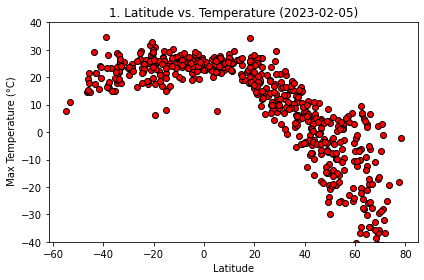

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o',facecolors='r', edgecolors='k')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel(' Max Temperature (°C)')
plt.ylim(-40,40)
date=city_data_df['Date'].min()
plt.title(f"1. Latitude vs. Temperature ({date})")
plt.tight_layout()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

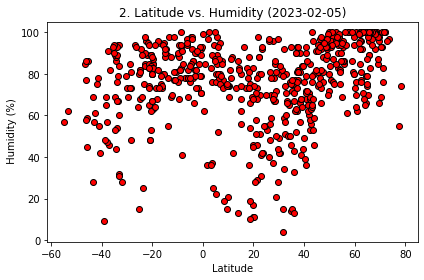

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o',facecolors='r', edgecolors='k')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel(' Humidity (%)')
# plt.ylim(-40,40)
date=city_data_df['Date'].min()
plt.title(f"2. Latitude vs. Humidity ({date})")
plt.tight_layout()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

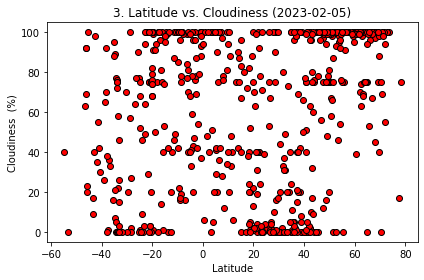

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o',facecolors='r', edgecolors='k')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness  (%)')
# plt.ylim(-40,40)
date=city_data_df['Date'].min()
plt.title(f"3. Latitude vs. Cloudiness ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

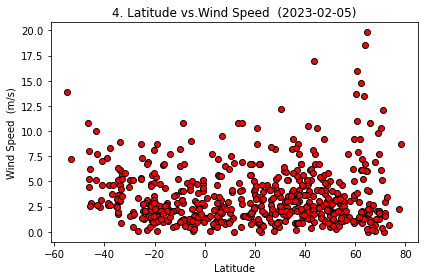

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o',facecolors='r', edgecolors='k')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed  (m/s)')
# plt.ylim(-40,40)
date=city_data_df['Date'].min()
plt.title(f"4. Latitude vs.Wind Speed  ({date})")
plt.tight_layout()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linREGRN(x,y,xplot,yplot):
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
        regress_values = x * slope + intercept
        line_eqn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x,y)
        plt.plot(x,regress_values,"r-")
        print(f'The r-square value is {rvalue}.')
        plt.annotate(line_eqn,(xplot, yplot),fontsize=15,color="b")
        plt.xlabel('Latitude')
        plt.grid()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>= 0,:]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rapid city,44.0805,-103.2310,9.29,46,75,7.72,US,2023-02-05
2,katsuura,35.1333,140.3000,9.25,72,11,3.73,JP,2023-02-05
3,jamestown,42.0970,-79.2353,5.80,60,100,6.17,US,2023-02-05
5,barcelos,41.5388,-8.6151,11.08,69,0,2.93,PT,2023-02-05
6,yellowknife,62.4560,-114.3525,-20.25,77,100,6.17,CA,2023-02-05


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao geraldo do araguaia,-6.4006,-48.5550,23.32,94,84,0.75,BR,2023-02-05
4,bluff,-46.6000,168.3333,14.64,85,63,10.85,NZ,2023-02-05
8,port alfred,-33.5906,26.8910,22.32,94,58,4.69,ZA,2023-02-05
9,hobart,-42.8794,147.3294,21.70,57,40,7.72,AU,2023-02-05
11,rocha,-34.4833,-54.3333,17.81,86,0,1.81,UY,2023-02-05


###  Temperature vs. Latitude Linear Regression Plot

The r-square value is -0.8450350204375976.


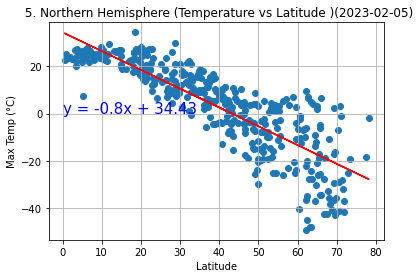

In [16]:
# Linear regression on Northern Hemisphere
plt.title(f' 5. Northern Hemisphere (Temperature vs Latitude )({date})')
plt.ylabel("Max Temp (°C)")
xplot=0
yplot=0

linREGRN(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],xplot,yplot)

plt.savefig("../output_data/Fig5.png")
plt.show()

The r-square value is 0.37472789212123103.


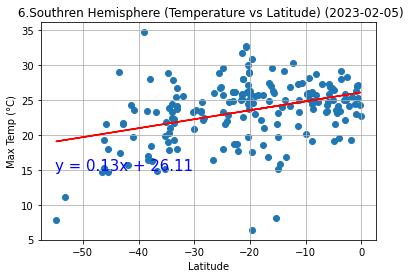

In [17]:
# Linear regression on Southern Hemisphere
plt.title(f' 6.Southren Hemisphere (Temperature vs Latitude) ({date})')
plt.ylabel("Max Temp (°C)")
xplot=-55
yplot=15

linREGRN(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],xplot,yplot)

plt.savefig("../output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a strong negative correlation between maximum temperature and latitude, meaning that as latitude increases, temperatures decrease. In contrast, in the Southern Hemisphere, there is a moderate positive relationship between these variables, indicating that as latitude increases, temperatures also increase. Overall, cities closer to the equator (Latitude = 0) tend to experience higher temperatures.





### Humidity vs. Latitude Linear Regression Plot

The r-square value is 0.4016017272919052.


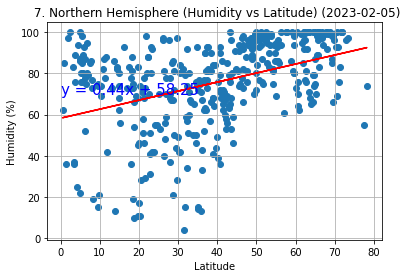

In [18]:
# Northern Hemisphere
plt.title(f' 7. Northern Hemisphere (Humidity vs Latitude) ({date})')
plt.ylabel("Humidity (%)")
xplot=0
yplot=70


linREGRN(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],xplot,yplot)


plt.savefig("../output_data/Fig7.png")
plt.show()

The r-square value is 0.40720874544993785.


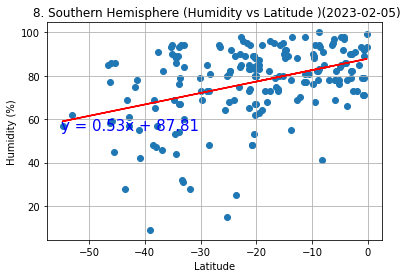

In [19]:
# Southern Hemisphere
plt.title(f' 8. Southern Hemisphere (Humidity vs Latitude )({date})')
plt.ylabel("Humidity (%)")
xplot=-55
yplot=55

# Linear regression on Southern Hemisphere
linREGRN(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],xplot,yplot)

# Save and show
plt.savefig("../output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** The regression analysis depicted in Figures 7 and 8 indicates a weak correlation between humidity and latitude in both the Northern and Southern Hemispheres. This suggests that proximity to the equator is not a significant factor in determining humidity levels in the sample of cities studied.

### Cloudiness vs. Latitude Linear Regression Plot

The r-square value is 0.3363388523801141.


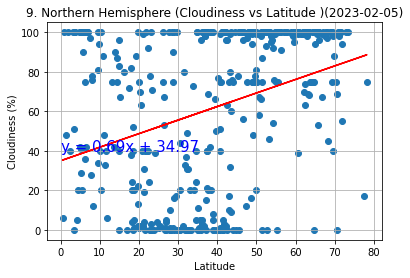

In [25]:
# Northern Hemisphere
plt.title(f"9. Northern Hemisphere (Cloudiness vs Latitude )({date})")
plt.ylabel("Cloudiness (%)")
xplot=0
yplot=40

linREGRN(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],xplot,yplot)

plt.savefig("../output_data/Fig9.png")
plt.show()

The r-square value is 0.32866500128185655.


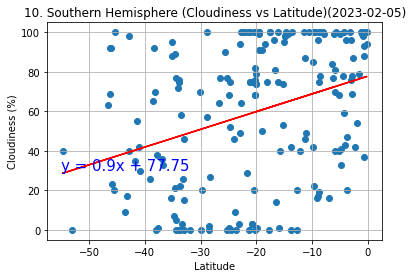

In [26]:
# Southern Hemisphere
plt.title(f'10. Southern Hemisphere (Cloudiness vs Latitude)({date})')
plt.ylabel("Cloudiness (%)")
xplot=-55
yplot=30


linREGRN(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],xplot,yplot)


plt.savefig("../output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** The regression analysis shown in Figures 9 and 10 reveals a very weak association between cloudiness and latitude in both the Northern and Southern Hemispheres. This implies that latitude is not a significant predictor of cloudiness levels in the sample of cities analyzed.

### Wind Speed vs. Latitude Linear Regression Plot

The r-square value is 0.09792377295510943.


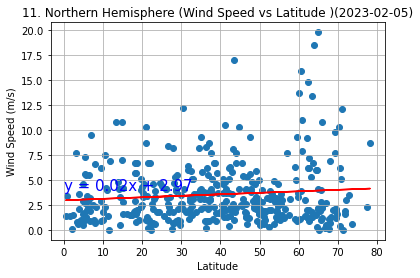

In [27]:
# Northern Hemisphere
plt.title(f"11. Northern Hemisphere (Wind Speed vs Latitude )({date})")
plt.ylabel("Wind Speed (m/s)")
xplot=0
yplot=4

linREGRN(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],xplot,yplot)


plt.savefig("../output_data/Fig11.png")
plt.show()

The r-square value is -0.3669912312288456.


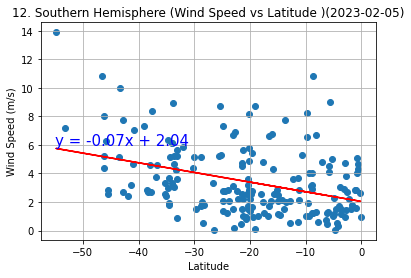

In [28]:
# Southern Hemisphere
plt.title(f"12. Southern Hemisphere (Wind Speed vs Latitude )({date})")
plt.ylabel("Wind Speed (m/s)")
xplot=-55
yplot=6


linREGRN(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],xplot,yplot)


plt.savefig("../output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** The regression analysis depicted in Figures 11 and 12 indicates a very weak correlation between wind speed and latitude in both the Northern and Southern Hemispheres. This suggests that latitude is not a substantial predictor of wind speed in the sample of cities studied.